<a href="https://colab.research.google.com/github/Shiveringapple/DeepLearing/blob/main/GAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
trans = [
    "airplane",										
    "automobile",										
    "bird",										
    "cat",										
    "deer",										
    "dog",										
    "frog",										
    "horse",										
    "ship",										
    "truck"
]

答案: cat


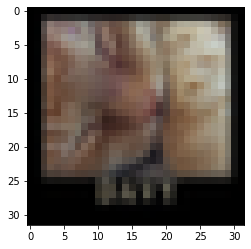

In [ ]:
import matplotlib.pyplot as plt
import random
idx = random.randint(0, x_train.shape[0])
print("答案:", trans[y_train[idx][0]])
plt.imshow(x_train[idx])

In [ ]:
# GlobalAveragePooling：取代Dense全連接層，直接將卷基層取平均

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
layers = [
    Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(256, 3, padding="same", activation="relu"),
    GlobalAveragePooling2D(),
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
global_average_pooling2d_5 ( (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [ ]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
       optimizer="adam",
       metrics=["accuracy"])

In [ ]:
x_train_norm = x_train / 255
x_test_norm = x_test / 255

In [ ]:
# batch:看幾筆在調整一次(20-200)
# epochs:整份訓練資料看幾遍 (10->60000*10)
# verbose: 0(quiet) 1(default) 2(我喜歡的)
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
callbacks = [
    ModelCheckpoint("cnn.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]
model.fit(x_train_norm,
     y_train,
     validation_split=0.1,
     batch_size=200,
     epochs=100,
     verbose=2,
     callbacks=callbacks)

Epoch 1/100
225/225 - 2s - loss: 1.8537 - accuracy: 0.3059 - val_loss: 1.6081 - val_accuracy: 0.4234
Epoch 2/100
225/225 - 2s - loss: 1.5374 - accuracy: 0.4425 - val_loss: 1.4162 - val_accuracy: 0.4880
Epoch 3/100
225/225 - 2s - loss: 1.4068 - accuracy: 0.4944 - val_loss: 1.3620 - val_accuracy: 0.5078
Epoch 4/100
225/225 - 2s - loss: 1.3282 - accuracy: 0.5230 - val_loss: 1.3008 - val_accuracy: 0.5420
Epoch 5/100
225/225 - 2s - loss: 1.2411 - accuracy: 0.5560 - val_loss: 1.2397 - val_accuracy: 0.5610
Epoch 6/100
225/225 - 2s - loss: 1.1902 - accuracy: 0.5791 - val_loss: 1.1367 - val_accuracy: 0.5948
Epoch 7/100
225/225 - 2s - loss: 1.1358 - accuracy: 0.5994 - val_loss: 1.0881 - val_accuracy: 0.6174
Epoch 8/100
225/225 - 2s - loss: 1.1000 - accuracy: 0.6112 - val_loss: 1.0791 - val_accuracy: 0.6204
Epoch 9/100
225/225 - 2s - loss: 1.0579 - accuracy: 0.6282 - val_loss: 1.0159 - val_accuracy: 0.6436
Epoch 10/100
225/225 - 2s - loss: 1.0282 - accuracy: 0.6368 - val_loss: 1.0198 - val_accura

In [ ]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.6583 - accuracy: 0.7757


[0.658349871635437, 0.7756999731063843]

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix
pre = model.predict_classes(x_test_norm)
print(pre.shape)
print(y_test.shape)
y_test_reshape = y_test.reshape(-1)
print(y_test_reshape.shape)
mat = confusion_matrix(y_test_reshape, pre)
pd.DataFrame(mat, 
       columns=["{}(預測)".format(trans[i]) for i in range(10)],
       index=["{}(真實)".format(trans[i]) for i in range(10)])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
(10000,)
(10000, 1)
(10000,)


,airplane(預測),automobile(預測),bird(預測),cat(預測),deer(預測),dog(預測),frog(預測),horse(預測),ship(預測),truck(預測)
airplane(真實),774,7,62,19,4,3,7,16,85,23
automobile(真實),24,797,3,14,1,5,7,4,38,107
bird(真實),41,1,717,64,56,33,51,24,7,6
cat(真實),18,3,70,636,32,137,47,28,17,12
deer(真實),14,2,65,60,708,41,29,70,9,2
dog(真實),14,2,34,165,21,689,22,39,5,9
frog(真實),5,1,38,59,34,22,822,8,7,4
horse(真實),12,1,32,37,33,43,2,830,3,7
ship(真實),36,5,12,8,2,4,7,4,906,16
truck(真實),32,26,6,15,1,2,4,12,24,878


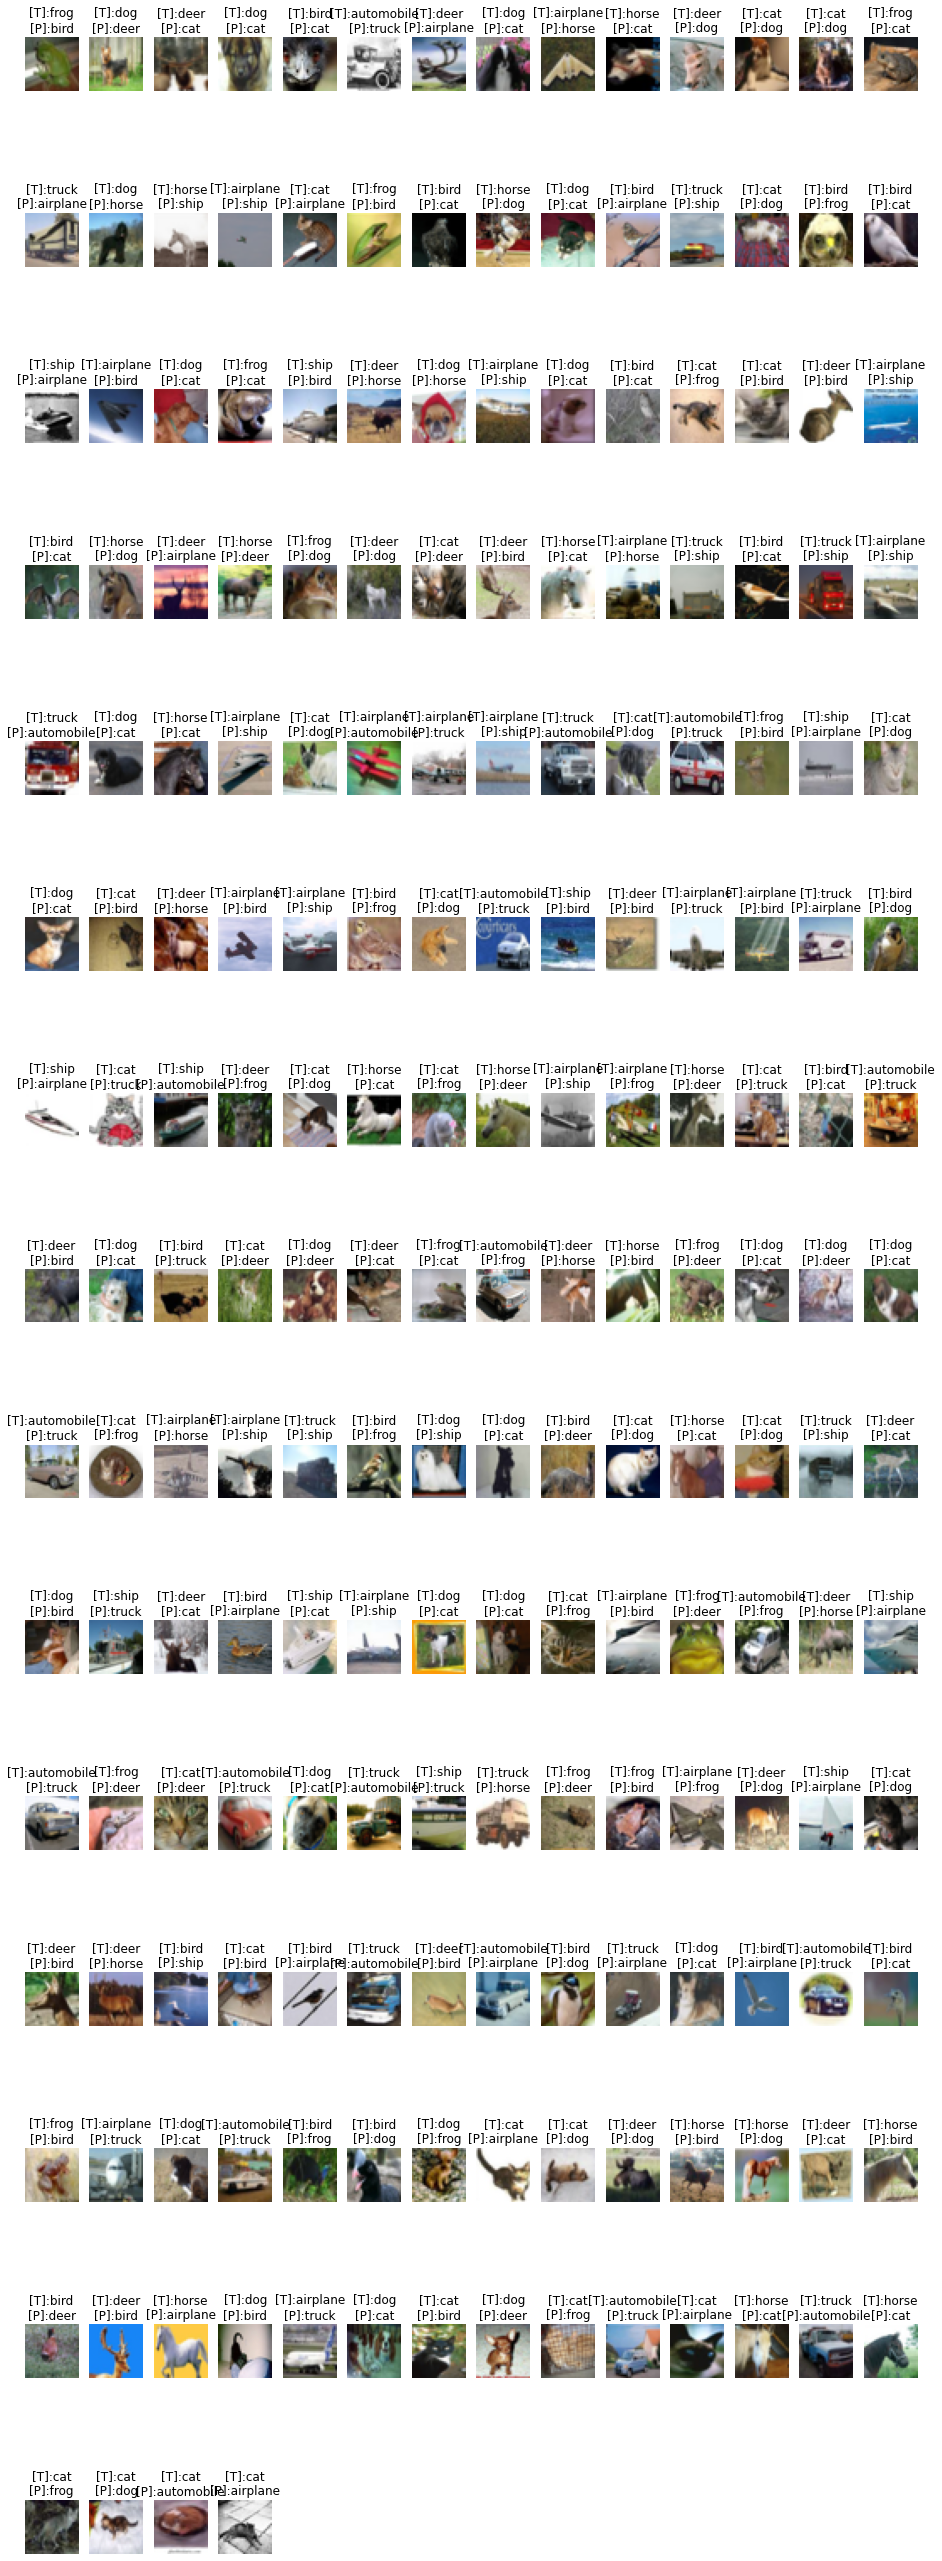

In [ ]:
import numpy as np
idx = np.nonzero(pre != y_test_reshape)[0]
idx = idx[:200]
img, label, pred = x_test[idx], y_test_reshape[idx], pre[idx]

plt.figure(figsize=(16, 48))
width = 14
height = len(img) // width + 1
for i in range(len(img)):
    plt.subplot(height, width, i+1)
    t = "[T]:{}\n[P]:{}".format(trans[label[i]], trans[pred[i]])
    plt.title(t)
    plt.axis("off")
    plt.imshow(img[i])

輸入網址:https://whitecherry2019.com/wp-content/uploads/2019/09/%E7%89%A0%E6%98%AF%E4%B8%96%E7%95%8C%E4%B8%8A%E6%9C%80%E5%8F%AF%E6%84%9B%E7%9A%84%E9%B3%A5%EF%BC%8C%E5%90%8D%E5%8F%AB%E3%80%8C%E7%B2%89%E7%B4%85%E7%BE%85%E8%B3%93%E3%80%8D%EF%BC%8C%E7%B4%85%E8%89%B2%E5%9C%93%E8%82%9A%E8%B6%85%E8%90%8C%E5%8F%88%E5%A4%A2%E5%B9%BB%EF%BC%81.jpg


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


airplane 的機率: 0.001
automobile 的機率: 0.002
bird 的機率: 0.906
cat 的機率: 0.011
deer 的機率: 0.002
dog 的機率: 0.068
frog 的機率: 0.003
horse 的機率: 0.007
ship 的機率: 0.0
truck 的機率: 0.001
最高機率: bird


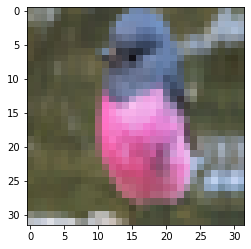

In [ ]:
# 爬蟲
import requests
from PIL import Image
url = input("輸入網址:")
# stream=True: 檔案傳回來, 不加純文字
# stream=True: response.raw stream=False: response.text
# verify=False: 別跟我說不安全
response = requests.get(url, stream=True, verify=False)
img = Image.open(response.raw).resize((32, 32))
test = np.array(img).reshape(1, 32, 32, 3) / 255
p = model.predict(test)[0]
for n, prob in zip(trans, p):
    print(n, "的機率:", round(prob, 3))
ans = model.predict_classes(test)[0]
print("最高機率:", trans[ans])
plt.imshow(img)

# 遷移學習 Inception
## 1.固定偷來的特徵萃取(CNN、BERT)
## 2.訓練MLP
## 3.微調(非必要)

# 殘差網路 ResNet
## y = x + w(x)
